# 1 - Perkenalan

**Bab pengenalan harus diisi dengan identitas.**

---------

**Hussein MS | Batch 10 | Phase 2**

------

# 2. Judul/Penanda Soal 

**Soal dan judul problem yang dikerjakan**

------

Objektif : 

+ memahami konsep Artificial Neural Network.
+ mempersiapkan data untuk digunakan dalam model Artificial Neural Network.
+ mengimplementasikan Artificial Neural Network dengan data yang diberikan.
+ menganalisis dan menjelaskan layer yang dibuat.

Problem : 

Customer attrition or customer churn occurs when customers or subscribers stop doing business with a company or service. Customer churn is a critical metric because it is much more cost effective to retain existing customers than it is to acquire new customers as it saves cost of sales and marketing. Customer retention is more cost-effective as you’ve already earned the trust and loyalty of existing customers.

**We hope that you could make a model, that could predict if Customer churn will occurs or not.**

------

# 3. Import Libraries

**Berisi semua library yang digunakan dalam project.**

---

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score, ConfusionMatrixDisplay
import tensorflow as tf 
from tensorflow.keras.models import load_model
from tensorflow.keras import initializers
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
import keras
import pathlib
from keras.preprocessing.image import ImageDataGenerator
import os
import glob
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

from keras.regularizers import l2
from keras.applications.mobilenet import MobileNet
from tensorflow.keras import layers
from tensorflow.keras import activations, models, optimizers, losses, metrics
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.applications.resnet_v2 import ResNet50V2 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet_v2 import ResNet50V2 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense, Dropout, Flatten, GlobalAvgPool2D, GlobalMaxPooling2D, Conv3D, Conv1D
import plotly.express as px
from sklearn.metrics import confusion_matrix
import warnings

In [2]:
if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. LSTMs and CNNs can be very slow without a GPU.")
else:
    print("Default GPU Device: {}".format(tf.config.list_physical_devices('GPU')))

Default GPU Device: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Cek gpu apakah avaiable untuk dijalankan di local

In [3]:
if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")

print(tf.__version__)

Default GPU Device:/device:GPU:0
2.9.0


In [4]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


Import library yang dibutuhkan

# 4. Data Loading

**Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.**

---

In [5]:
pd.options.display.max_columns = None

untuk menunjukan semua kolom 

In [6]:
train_folder="datasets/human_data/train_data"
test_folder="datasets/human_data/test_data"

Set Directory untuk folder train dan test

In [7]:
data_dir = pathlib.Path(train_folder)
class_name = np.array(sorted(item.name for item in data_dir.glob('*')))
print(class_name)

['calling' 'clapping' 'cycling' 'dancing' 'drinking' 'eating' 'fighting'
 'hugging' 'laughing' 'listening_to_music' 'running' 'sitting' 'sleeping'
 'texting' 'using_laptop']


Ambil Class yang ada dalam directory Train-Test

In [8]:
# train_datagen=ImageDataGenerator(rescale=1./255.)
# test_datagen=ImageDataGenerator(rescale=1./255.)

# train_data=train_datagen.flow_from_directory(train_folder,
#                                             target_size=(224,224),
#                                             batch_size=32,
#                                             class_mode='categorical')
# test_data=test_datagen.flow_from_directory(test_folder,
#                                           target_size=(224,224),
#                                           batch_size=32,
#                                           class_mode='categorical')

In [9]:
ht=0
wt=0
samples=0
sample_count=10


for i in [train_folder, test_folder]:
    filepaths = []
    labels = []
    class_name = os.listdir(i)
    for klass in class_name:
        classpath = os.path.join(i, klass)
        clist = os.listdir(classpath)
        for d, f in enumerate(clist):
            fpath = os.path.join(classpath, f)
            filepaths.append(fpath)
            labels.append(klass)

            if d < sample_count:
                img = plt.imread(fpath)
                ht += img.shape[0]
                wt += img.shape[1]
                samples += 1
                
        Fseries = pd.Series(filepaths, name='images')
        Lseries = pd.Series(labels, name='labels')
        if i == train_folder:
            df = pd.concat([Fseries, Lseries], axis=1) #masukan trainset ke dalam variabel df 
        else:
            test_df = pd.concat([Fseries, Lseries], axis=1) #masukan testset ke dalam variabel test_df

Kita gunakan Fungsi Loop untuk membuat dataframe dari directory yang telah dibuat. 

----

# 5. EDA 

**Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.**

----

In [10]:
df

images        labels
0      datasets/human_data/train_data\calling\images_...       calling
1      datasets/human_data/train_data\calling\images_...       calling
2      datasets/human_data/train_data\calling\images_...       calling
3      datasets/human_data/train_data\calling\images_...       calling
4      datasets/human_data/train_data\calling\images_...       calling
...                                                  ...           ...
14995  datasets/human_data/train_data\using_laptop\im...  using_laptop
14996  datasets/human_data/train_data\using_laptop\im...  using_laptop
14997  datasets/human_data/train_data\using_laptop\im...  using_laptop
14998  datasets/human_data/train_data\using_laptop\im...  using_laptop
14999  datasets/human_data/train_data\using_laptop\im...  using_laptop

[15000 rows x 2 columns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   images  15000 non-null  object
 1   labels  15000 non-null  object
dtypes: object(2)
memory usage: 234.5+ KB


Dataset yang diolah mempunyai bentuk ***15000  Baris dan 2 Kolom dengan range 0-14.999*** <br> 
Tidak terdapat *missing value* pada dataset.

---

In [12]:
texting_samples = (df[df['labels']=="texting"]['images'].iloc[:5]).tolist()
running_samples = (df[df['labels']=='running']['images'].iloc[:5]).tolist()

Kita akan ambil sampel untuk melihat gambar yang ada pada Dataset. 

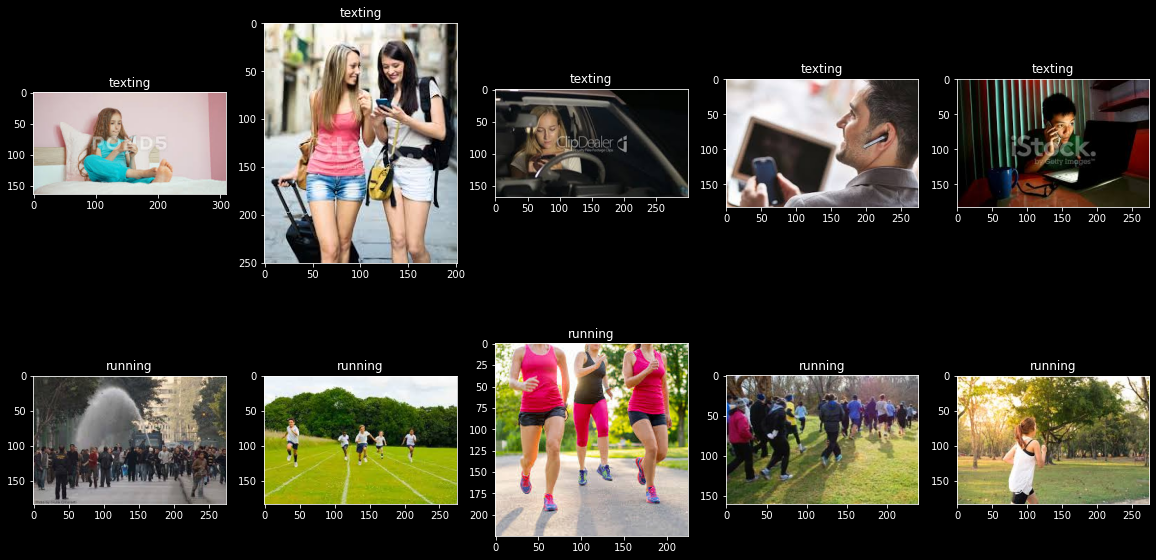

In [13]:
# visualize sample images
def visualize_samples(sample_list):
    fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(20,10))
    for i, sample_list in enumerate(sample_list):
        img = cv2.imread(sample_list)
        ax[i//5, i%5].set_title(sample_list.split('\\')[1])
        ax[i//5, i%5].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

visualize_samples(texting_samples + running_samples)

Dari sampel visualisasi yang diambil, tiap gambar memiliki beragam banyaknya pixel. untuk itu, perlu kita lakukan normalisasi pada Gambar.

---

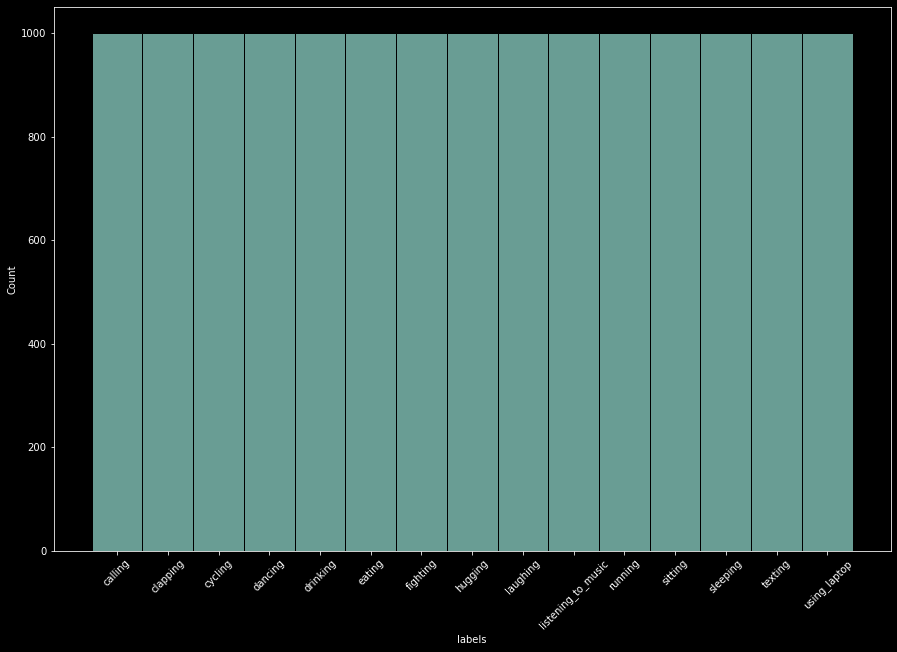

In [14]:
plt.figure(figsize=(15,10))
sns.histplot(df['labels'], 
             bins=15, 
             binwidth=5,
             edgecolor='black')
plt.xticks(rotation=45)
plt.show()

Data gambar yang kita punya ternyata tersebar secara merata. dapat dilihat dari visualisasi Label.

----

In [15]:
figmon = px.histogram(df, x="labels", 
                   title="Train Labels Visualization", color="labels",
                   text_auto='.2s')
figmon.update_layout(bargap=0.2)
figmon.update_xaxes(categoryorder="total ascending")
figmon.show()

Data gambar yang kita punya ternyata tersebar secara merata labelnya. dapat dibuktikan dari visualisasi Label.

---

# 6. Data Preprocessing 

**Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test-inference, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.**

---

In [227]:
train_df, val_df, = train_test_split(df, test_size=0.1, random_state=36, stratify=df['labels'])

**Split dataset**

*train_df merupakan data training yang akan kita gunakan ketika training model*

*val_df merupakan data validasi saat kita melakukan training model*

---

In [17]:
# y_train_ohe = to_categorical(np.asarray(y_train.factorize()[0]))
# y_val_ohe = to_categorical(np.asarray(y_val.factorize()[0]))
# y_test_ohe = to_categorical(np.asarray(y_test.factorize()[0]))
# # The factorize() method encodes each string to a categorical value because to_categorical can only take dtpye of int or float

In [228]:
img_height = 224
img_width = 224
img_ch = 3
SEED = 36
BATCH = 32

Ukuran Input Image yang akan kita gunakan pada saat training

In [229]:
# augmentasi data
train_datagen = ImageDataGenerator(
    rescale=1./255, #normalisasi pixel
    rotation_range=40, #0.1
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=[0.5,1.0],
    horizontal_flip=True,
    brightness_range=[0.5,2.0]
    )
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

Image data Generator merupakan fungsi yang bisa digunakan agar model mengetahui pola dari gambar. seperti dengan merotasi, memberikan pencahayaan, dll.

In [230]:
df_train1 = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='images',
    y_col='labels',
    target_size=(img_height, img_width),
    class_mode="categorical",
    batch_size=BATCH,
    shuffle=True,
    seed=SEED)

df_val1 = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='images',
    y_col='labels',
    target_size=(img_height, img_width),
    class_mode="categorical",
    batch_size=BATCH,
    shuffle=False,
    seed=SEED)

df_test1 = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='images',
    y_col='labels',
    target_size=(img_height, img_width),
    class_mode="categorical",
    batch_size=BATCH,
    shuffle=False,
    seed=SEED)

Found 13500 validated image filenames belonging to 15 classes.
Found 1500 validated image filenames belonging to 15 classes.
Found 3000 validated image filenames belonging to 15 classes.


In [21]:
# create a callback 

callbacks = [
                 EarlyStopping(monitor= 'val_loss', mode='min', patience= 3),
                 ModelCheckpoint('model_best.hdf5', monitor='val_loss', save_best_only=True)
                 #ReduceLROnPlateau
]

Fungsi Callbacks digunakan agar ketika melakukan epochs, saat model kita mengalami penurunan performa(kita set monitornya ke val_loss) dapat dihentikan trainingnya. 

---

# 7. Model Definition

**Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.**

----

### **Deklarasi Model** 

#### **Base Model**

**Sequential Api**

In [22]:
# arsitektur nn

input = [img_height, img_width,3]

model_a = Sequential()

#conv1 
model_a.add(Conv2D(filters=16, kernel_size=5, activation='tanh', padding='same', input_shape=input))
model_a.add(MaxPooling2D(pool_size=2))
#conv2 
model_a.add(Conv2D(filters=32, kernel_size=5, padding='same', activation='tanh'))
model_a.add(MaxPooling2D(pool_size=2, strides=2))
#conv3
model_a.add(Conv2D(filters=64, kernel_size=5, padding='same', activation='tanh'))
model_a.add(MaxPooling2D(pool_size=2, strides=2))
model_a.add(Dropout(0.25))

#flatten 
model_a.add(Flatten())
model_a.add(Dense(128, activation='relu'))


model_a.add(Dense(15, activation="softmax"))

In [23]:
model_a.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        51264     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [24]:
model_a.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
                metrics=['accuracy'])

In [25]:
history_a = model_a.fit(df_train1, batch_size= BATCH, epochs=50, validation_data=df_val1, callbacks= callbacks)

Epoch 1/50
422/422 [==============================] - 164s 380ms/step - loss: 2.6740 - accuracy: 0.1350 - val_loss: 2.4604 - val_accuracy: 0.2047
Epoch 2/50
422/422 [==============================] - 164s 389ms/step - loss: 2.5819 - accuracy: 0.1350 - val_loss: 2.5644 - val_accuracy: 0.1367
Epoch 3/50
422/422 [==============================] - 162s 383ms/step - loss: 2.7339 - accuracy: 0.1116 - val_loss: 2.7098 - val_accuracy: 0.0667
Epoch 4/50
422/422 [==============================] - 168s 398ms/step - loss: 2.7094 - accuracy: 0.0641 - val_loss: 2.7086 - val_accuracy: 0.0667


In [26]:
keras.backend.clear_session()

----

**Functional Api**

In [27]:
#arsitektur model NN
data_in = Input(shape=(img_height, img_width, 3))


x = Conv2D(filters=16, kernel_size=3, activation='tanh', kernel_regularizer=l2(0.00005), padding='same')(data_in)
x = MaxPooling2D(pool_size=2, strides=2)(x)
x = BatchNormalization()(x)

x1 = Conv2D(filters=32, kernel_size=3,kernel_regularizer=l2(0.00005),  padding='same', activation='tanh')(x)
x1 = MaxPooling2D(pool_size=2, strides=2)(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0.1)(x1)

x2 = Conv2D(filters=64, kernel_size=3,kernel_regularizer=l2(0.00005),  padding='same', activation='tanh')(x1)
x2 = MaxPooling2D(pool_size=2, strides=2,)(x2)
x2 = BatchNormalization()(x2)
x2 = Dropout(0.1)(x2)

x3 = Conv2D(filters=128, kernel_size=3,activation='tanh')(x2)
x3 = MaxPooling2D(pool_size=2, strides=2)(x3)
x3 = BatchNormalization()(x3)
x3 = Dropout(0.25)(x3)

flat = Flatten()(x3)

denselayer1 = Dense(64, activation='relu')(flat)
denselayer1 = BatchNormalization()(denselayer1)

output = Dense(15, activation="softmax")(denselayer1)


model_b = Model(inputs=data_in, outputs=output)

#compile 
model_b.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
                metrics=['accuracy'])

#train
history_b = model_b.fit(df_train1, batch_size=BATCH, epochs=50, validation_data=df_val1, callbacks=callbacks)


Epoch 1/50
422/422 [==============================] - 162s 380ms/step - loss: 2.5851 - accuracy: 0.1570 - val_loss: 2.5461 - val_accuracy: 0.1733
Epoch 2/50
422/422 [==============================] - 157s 372ms/step - loss: 2.4619 - accuracy: 0.1881 - val_loss: 2.5740 - val_accuracy: 0.1667
Epoch 3/50
422/422 [==============================] - 161s 380ms/step - loss: 2.4147 - accuracy: 0.2062 - val_loss: 2.2623 - val_accuracy: 0.2620
Epoch 4/50
422/422 [==============================] - 160s 378ms/step - loss: 2.3819 - accuracy: 0.2150 - val_loss: 2.3636 - val_accuracy: 0.2260
Epoch 5/50
422/422 [==============================] - 161s 382ms/step - loss: 2.3586 - accuracy: 0.2247 - val_loss: 2.2424 - val_accuracy: 0.2813
Epoch 6/50
422/422 [==============================] - 162s 383ms/step - loss: 2.3318 - accuracy: 0.2367 - val_loss: 2.4882 - val_accuracy: 0.2207
Epoch 7/50
422/422 [==============================] - 160s 380ms/step - loss: 2.3067 - accuracy: 0.2448 - val_loss: 2.1804 -

In [28]:
model_b.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 16)     64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0     

Kemungkinan model mengalami masalah Exploding Gradient. terlihat mengalami kenaikan val-loss tertinggi di epochs 10, dan Gradientnya pun masih naik turun.

In [29]:
keras.backend.clear_session()

----

#### **Model Improvement**

Pada bagian Model Improvement, kita akan coba gunakan Pretrained model. Apakah akan menghasilkan akurasi ataupun Loss yang lebih baik daripada menggunakan Base Model saja. 

**EfficientNet**

In [211]:
from keras.applications.efficientnet_v2 import EfficientNetV2B2

In [233]:
base_ef = EfficientNetV2B2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

In [213]:
base_ef.output

<KerasTensor: shape=(None, 7, 7, 1408) dtype=float32 (created by layer 'top_activation')>

In [234]:
model_c = Sequential()

model_c.add(base_ef)
model_c.add(Reshape((), input_shape=(None, 7, 7, 1408)))
# model_c.add(Reshape((), input_shape=(None,7,7,512)))

#conv1 
model_c.add(Conv2D(filters=512, kernel_size=3, padding='same' , activation='relu'))
# model_c.add(MaxPooling2D(pool_size=3))

#flatten 
model_c.add(Flatten())
model_c.add(Dense(128, activation='relu'))


model_c.add(Dense(15, activation="softmax"))

# compile the model
model_c.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), loss = 'categorical_crossentropy', metrics= ['accuracy'])

ValueError: Exception encountered when calling layer "reshape_18" (type Reshape).

total size of new array must be unchanged, input_shape = [7, 7, 1408], output_shape = [1, 32, 44, 1]

Call arguments received by layer "reshape_18" (type Reshape):
  • inputs=tf.Tensor(shape=(None, 7, 7, 1408), dtype=float32)

In [239]:
history_c = model_c.fit(df_train1, batch_size=BATCH, epochs=50, validation_data=df_val1, callbacks=callbacks)

Epoch 1/50


ValueError: in user code:

    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\losses.py", line 1787, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\backend.py", line 5119, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, None) and (None, 7, 7, 1408) are incompatible


**MobileNet**

In [114]:
base_mobile = tf.keras.applications.MobileNet(input_shape=(224,224,3),
                                              include_top=False, 
                                              weights='imagenet',
                                              classifier_activation="softmax")

In [31]:
base_mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [110]:
base_mobile.output

<KerasTensor: shape=(None, 7, 7, 1024) dtype=float32 (created by layer 'conv_pw_13_relu')>

In [32]:
# Freeze the base_model
base_mobile.trainable = False

# append my own layers on the top of the model for Transfer Learning
x = base_mobile.output

# 1st conv block
x = Conv2D(256, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)

# 2nd conv block
x = Conv2D(128, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)

# 1st FC layer
x = Flatten()(x) 
x = Dense(64)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

# 2nd FC layer
x = Dense(32, activation = 'relu')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(.2)(x)

x = Dense(15, 'softmax')(x)

model_mobilnet = keras.models.Model(inputs = base_mobile.input, outputs = x)

# compile the model
model_mobilnet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), loss = 'categorical_crossentropy', metrics= ['accuracy'])

In [33]:
history_d = model_mobilnet.fit(df_train1, batch_size=BATCH, epochs=50, validation_data=df_val1, callbacks=callbacks)

Epoch 1/50
422/422 [==============================] - 158s 369ms/step - loss: 2.0970 - accuracy: 0.3435 - val_loss: 1.4795 - val_accuracy: 0.5573
Epoch 2/50
422/422 [==============================] - 155s 367ms/step - loss: 1.7441 - accuracy: 0.4607 - val_loss: 1.3009 - val_accuracy: 0.5880
Epoch 3/50
422/422 [==============================] - 155s 367ms/step - loss: 1.5887 - accuracy: 0.5079 - val_loss: 1.1515 - val_accuracy: 0.6293
Epoch 4/50
422/422 [==============================] - 156s 370ms/step - loss: 1.5424 - accuracy: 0.5244 - val_loss: 1.2089 - val_accuracy: 0.6127
Epoch 5/50
422/422 [==============================] - 165s 392ms/step - loss: 1.4910 - accuracy: 0.5403 - val_loss: 1.0846 - val_accuracy: 0.6580
Epoch 6/50
422/422 [==============================] - 171s 406ms/step - loss: 1.4498 - accuracy: 0.5484 - val_loss: 1.0637 - val_accuracy: 0.6707
Epoch 7/50
422/422 [==============================] - 173s 411ms/step - loss: 1.4151 - accuracy: 0.5584 - val_loss: 1.1097 -

In [187]:
keras.backend.clear_session()

----

**ResNet**

In [35]:
base_res2 = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224,224,3), classifier_activation="softmax")

In [36]:
# Freeze the base_model
base_res2.trainable = False

# append my own layers on the top of the model for Transfer Learning
x = base_res2.output

# 1st conv block
x = Conv2D(64, (2,2), activation='tanh', kernel_initializer=tf.keras.initializers.GlorotNormal, padding='same')(x)
x = Dropout(0.2)(x)
x = Conv2D(64, (2,2), activation='tanh', kernel_initializer=tf.keras.initializers.GlorotNormal, padding='same')(x)
x = MaxPooling2D()(x)

# 2nd conv block
x1 = Conv2D(128, (2,2), activation='tanh', kernel_initializer=tf.keras.initializers.GlorotNormal, padding='same')(x)
x1 = Dropout(0.2)(x1)
x1 = Conv2D(128, (2,2), activation='tanh', kernel_initializer=tf.keras.initializers.GlorotNormal, padding='same')(x1)
x1 = MaxPooling2D()(x1)

# flatten
x = Flatten()(x1) 
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)

x = Dense(32, activation = 'relu')(x)
x = BatchNormalization()(x)
x = Dropout(.25)(x)

x = Dense(15, 'softmax')(x)

model_f = keras.models.Model(inputs = base_res2.input, outputs = x)

# compile the model
model_f.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), loss = 'categorical_crossentropy', metrics= ['accuracy'])

In [37]:
history_f = model_f.fit(df_train1, batch_size=BATCH, epochs=50, validation_data=df_val1, callbacks=callbacks)

Epoch 1/50
422/422 [==============================] - 178s 410ms/step - loss: 2.3100 - accuracy: 0.2613 - val_loss: 1.6715 - val_accuracy: 0.4413
Epoch 2/50
422/422 [==============================] - 185s 438ms/step - loss: 1.9227 - accuracy: 0.3754 - val_loss: 1.4987 - val_accuracy: 0.5167
Epoch 3/50
422/422 [==============================] - 178s 421ms/step - loss: 1.8152 - accuracy: 0.4104 - val_loss: 1.3849 - val_accuracy: 0.5460
Epoch 4/50
422/422 [==============================] - 168s 398ms/step - loss: 1.7516 - accuracy: 0.4430 - val_loss: 1.4556 - val_accuracy: 0.5340
Epoch 5/50
422/422 [==============================] - 174s 412ms/step - loss: 1.6982 - accuracy: 0.4582 - val_loss: 1.4348 - val_accuracy: 0.5253
Epoch 6/50
422/422 [==============================] - 178s 421ms/step - loss: 1.6756 - accuracy: 0.4701 - val_loss: 1.4233 - val_accuracy: 0.5427


In [38]:
keras.backend.clear_session()

---

**ResNet50V2**

In [67]:
base_res = ResNet50V2(weights='imagenet',include_top=False, input_shape=(224,224,3), classifier_activation="softmax")

In [68]:
base_res.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                         

In [72]:
# Freeze the base_model
base_res.trainable = False

# append my own layers on the top of the model for Transfer Learning
x = base_res.output

# 1st conv block
x = Conv2D(256, 5, padding='same')(x)
x = Activation('tanh')(x)
x = MaxPooling2D()(x)

# 2nd conv block
x = Conv2D(128, 5, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('tanh')(x)
x = MaxPooling2D()(x)

# 1st FC layer
x = Flatten()(x) 
x = Dense(64)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

# 2nd FC layer
x = Dense(32, activation = 'relu')(x)
x = BatchNormalization()(x)
x = Dropout(.2)(x)

x = Dense(15, 'softmax')(x)

model_g = keras.models.Model(inputs = base_res.input, outputs = x)

# compile the model
model_g.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])

In [73]:
model_g.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [74]:
history_g =  model_g.fit(df_train1, batch_size=BATCH, epochs=50, validation_data=df_val1, callbacks=callbacks)

Epoch 1/50
422/422 [==============================] - 188s 435ms/step - loss: 2.1957 - accuracy: 0.3010 - val_loss: 1.7157 - val_accuracy: 0.4733
Epoch 2/50
422/422 [==============================] - 172s 407ms/step - loss: 1.8714 - accuracy: 0.3908 - val_loss: 1.4312 - val_accuracy: 0.5233
Epoch 3/50
422/422 [==============================] - 184s 435ms/step - loss: 1.7980 - accuracy: 0.4182 - val_loss: 1.4672 - val_accuracy: 0.5173
Epoch 4/50
422/422 [==============================] - 179s 425ms/step - loss: 1.7229 - accuracy: 0.4475 - val_loss: 1.4284 - val_accuracy: 0.5340
Epoch 5/50
422/422 [==============================] - 188s 446ms/step - loss: 1.7171 - accuracy: 0.4432 - val_loss: 1.5160 - val_accuracy: 0.4913
Epoch 6/50
422/422 [==============================] - 182s 431ms/step - loss: 1.6983 - accuracy: 0.4502 - val_loss: 1.3997 - val_accuracy: 0.5280
Epoch 7/50
422/422 [==============================] - 181s 427ms/step - loss: 1.6728 - accuracy: 0.4572 - val_loss: 1.4502 -

In [75]:
keras.backend.clear_session()

---

# 8. Model Evaluation

**Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.**

### **Model Before Improvement**

**Sequential API**

In [ ]:
metrics_a = pd.DataFrame(history_a.history)
metrics_a

loss  accuracy  val_loss  val_accuracy
0  2.674029  0.135037  2.460371      0.204667
1  2.581879  0.134963  2.564406      0.136667
2  2.733902  0.111630  2.709791      0.066667
3  2.709395  0.064148  2.708590      0.066667

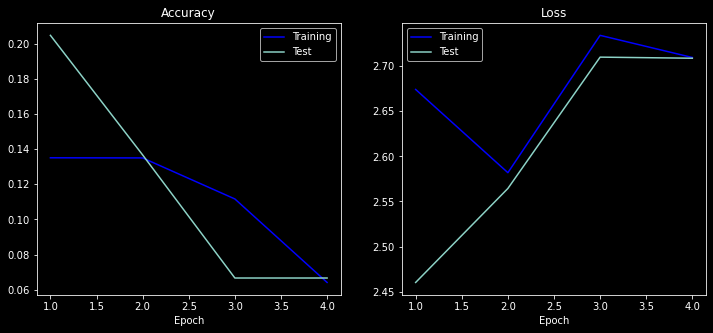

In [ ]:
figf2,axf2=plt.subplots(ncols=2,figsize=(12,5))
epochs=len(history_a.history['accuracy'])
axf2[0].plot(range(1,epochs+1),history_a.history['accuracy'],label='Training', color='blue')
axf2[0].plot(range(1,epochs+1),history_a.history['val_accuracy'],label='Test')
axf2[0].set_title('Accuracy')
axf2[0].set_xlabel('Epoch')
axf2[0].legend()

axf2[1].plot(range(1,epochs+1),history_a.history['loss'],label='Training', color='blue')
axf2[1].plot(range(1,epochs+1),history_a.history['val_loss'],label='Test')
axf2[1].set_title('Loss')
axf2[1].set_xlabel('Epoch')
axf2[1].legend()

Kesimpulan yang bisa kita ambil : 
+ Hasil Training mengalami penurunan performa setelah melewati Epochs 10, dilihat dari akurasinya pun terbilang cukup rendah jika kita gunakan base model dari Sequential.

---

**Functional API**

In [ ]:
metrics_b = pd.DataFrame(history_b.history)
metrics_b 

loss  accuracy  val_loss  val_accuracy
0   2.585101  0.156963  2.546086      0.173333
1   2.461917  0.188148  2.574030      0.166667
2   2.414654  0.206222  2.262320      0.262000
3   2.381902  0.215037  2.363580      0.226000
4   2.358626  0.224667  2.242362      0.281333
5   2.331791  0.236741  2.488206      0.220667
6   2.306650  0.244815  2.180371      0.275333
7   2.288604  0.246593  2.155955      0.314667
8   2.270508  0.258593  2.210561      0.275333
9   2.252927  0.258815  2.146591      0.314667
10  2.244294  0.265111  2.091552      0.314000
11  2.209440  0.280593  2.164737      0.305333
12  2.200233  0.279630  2.203906      0.286000
13  2.183731  0.286296  2.238850      0.298000

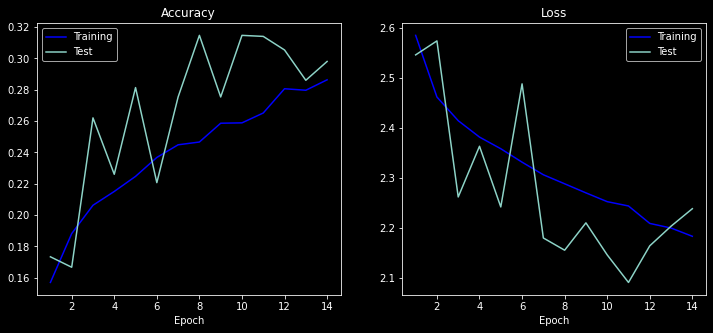

In [ ]:
figf2,axf2=plt.subplots(ncols=2,figsize=(12,5))
epochs=len(history_b.history['accuracy'])
axf2[0].plot(range(1,epochs+1),history_b.history['accuracy'],label='Training', color='blue')
axf2[0].plot(range(1,epochs+1),history_b.history['val_accuracy'],label='Test')
axf2[0].set_title('Accuracy')
axf2[0].set_xlabel('Epoch')
axf2[0].legend()

axf2[1].plot(range(1,epochs+1),history_b.history['loss'],label='Training', color='blue')
axf2[1].plot(range(1,epochs+1),history_b.history['val_loss'],label='Test')
axf2[1].set_title('Loss')
axf2[1].set_xlabel('Epoch')
axf2[1].legend()

Kesimpulan yang bisa kita ambil : 
 
+ Model yang kita buat, ternyata mengalami overfitting. 

---

### **Model Improvement Result**

**Mobilenet**

In [ ]:
metrics_mbl = pd.DataFrame(history_d.history)
metrics_mbl

loss  accuracy  val_loss  val_accuracy
0   2.096977  0.343481  1.479506      0.557333
1   1.744097  0.460667  1.300905      0.588000
2   1.588696  0.507852  1.151511      0.629333
3   1.542356  0.524370  1.208862      0.612667
4   1.490986  0.540296  1.084632      0.658000
5   1.449782  0.548444  1.063739      0.670667
6   1.415121  0.558444  1.109705      0.656667
7   1.389156  0.564741  1.061762      0.678000
8   1.380113  0.577111  1.057951      0.665333
9   1.345011  0.585333  1.020744      0.672000
10  1.339658  0.585556  1.064297      0.665333
11  1.321399  0.590222  1.002124      0.691333
12  1.282551  0.599704  1.052848      0.675333
13  1.288775  0.601704  1.020920      0.684667
14  1.250737  0.616074  1.006130      0.676667

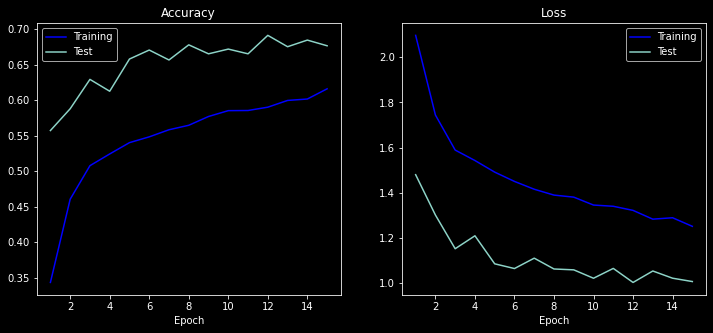

In [ ]:
figimp,aximp=plt.subplots(ncols=2,figsize=(12,5))
epochs=len(history_d.history['accuracy'])
aximp[0].plot(range(1,epochs+1),history_d.history['accuracy'],label='Training', color='blue')
aximp[0].plot(range(1,epochs+1),history_d.history['val_accuracy'],label='Test')
aximp[0].set_title('Accuracy')
aximp[0].set_xlabel('Epoch')
aximp[0].legend()

aximp[1].plot(range(1,epochs+1),history_d.history['loss'],label='Training', color='blue')
aximp[1].plot(range(1,epochs+1),history_d.history['val_loss'],label='Test')
aximp[1].set_title('Loss')
aximp[1].set_xlabel('Epoch')
aximp[1].legend()

Setelah dilakukan Improvement, ternyata Kita mengalami masalah Exploding Gradient.

----

**Resnet**

In [ ]:
metrics_d = pd.DataFrame(history_d.history)
metrics_d

loss  accuracy  val_loss  val_accuracy
0   2.096977  0.343481  1.479506      0.557333
1   1.744097  0.460667  1.300905      0.588000
2   1.588696  0.507852  1.151511      0.629333
3   1.542356  0.524370  1.208862      0.612667
4   1.490986  0.540296  1.084632      0.658000
5   1.449782  0.548444  1.063739      0.670667
6   1.415121  0.558444  1.109705      0.656667
7   1.389156  0.564741  1.061762      0.678000
8   1.380113  0.577111  1.057951      0.665333
9   1.345011  0.585333  1.020744      0.672000
10  1.339658  0.585556  1.064297      0.665333
11  1.321399  0.590222  1.002124      0.691333
12  1.282551  0.599704  1.052848      0.675333
13  1.288775  0.601704  1.020920      0.684667
14  1.250737  0.616074  1.006130      0.676667

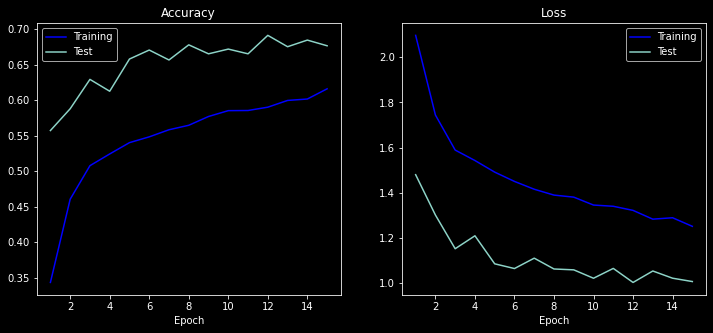

In [ ]:
figf2,axf2=plt.subplots(ncols=2,figsize=(12,5))
epochs=len(history_d.history['accuracy'])
axf2[0].plot(range(1,epochs+1),history_d.history['accuracy'],label='Training', color='blue')
axf2[0].plot(range(1,epochs+1),history_d.history['val_accuracy'],label='Test')
axf2[0].set_title('Accuracy')
axf2[0].set_xlabel('Epoch')
axf2[0].legend()

axf2[1].plot(range(1,epochs+1),history_d.history['loss'],label='Training', color='blue')
axf2[1].plot(range(1,epochs+1),history_d.history['val_loss'],label='Test')
axf2[1].set_title('Loss')
axf2[1].set_xlabel('Epoch')
axf2[1].legend()

Model dari Functional API, terlihat lebih menjanjikan meskipun nilai lossnya naik dan akurasinya menurun. Dari visualisasi Gradientnya, tidak terlihat masalah seperti Vanishing, maupun Exploding Gradient.

---

**ResnetV2**

In [ ]:
metrics_g = pd.DataFrame(history_g.history)
metrics_g

loss  accuracy  val_loss  val_accuracy
0   2.288405  0.275926  1.716318      0.436667
1   1.891873  0.391259  1.634167      0.486667
2   1.764652  0.432296  1.514140      0.494667
3   1.716138  0.451259  1.394064      0.538000
4   1.684397  0.462889  1.306547      0.576667
5   1.663518  0.465111  1.335689      0.559333
6   1.621602  0.480148  1.335090      0.560000
7   1.621616  0.480667  1.274769      0.598000
8   1.610012  0.490815  1.282918      0.573333
9   1.602025  0.487926  1.295398      0.574667
10  1.592742  0.492222  1.301416      0.578000

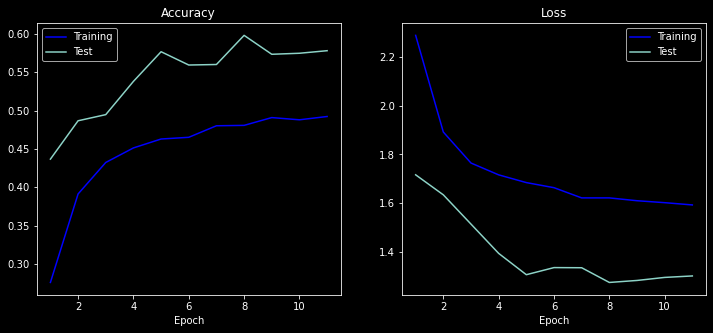

In [ ]:
figf2,axf2=plt.subplots(ncols=2,figsize=(12,5))
epochs=len(history_g.history['accuracy'])
axf2[0].plot(range(1,epochs+1),history_g.history['accuracy'],label='Training', color='blue')
axf2[0].plot(range(1,epochs+1),history_g.history['val_accuracy'],label='Test')
axf2[0].set_title('Accuracy')
axf2[0].set_xlabel('Epoch')
axf2[0].legend()

axf2[1].plot(range(1,epochs+1),history_g.history['loss'],label='Training', color='blue')
axf2[1].plot(range(1,epochs+1),history_g.history['val_loss'],label='Test')
axf2[1].set_title('Loss')
axf2[1].set_xlabel('Epoch')
axf2[1].legend()

#### **Classification Report**

In [ ]:
val_label = df_val1.classes

In [ ]:
df_val1.class_indices

{'calling': 0,
 'clapping': 1,
 'cycling': 2,
 'dancing': 3,
 'drinking': 4,
 'eating': 5,
 'fighting': 6,
 'hugging': 7,
 'laughing': 8,
 'listening_to_music': 9,
 'running': 10,
 'sitting': 11,
 'sleeping': 12,
 'texting': 13,
 'using_laptop': 14}

##### **Before Tunning**

**Sequential API**

In [ ]:
val_pred_a = model_a.predict(df_val1, steps=len(df_val1))
y_valpred_a = np.argmax(val_pred_a, axis=1)
print(classification_report(val_label, y_valpred_a))

47/47 [==============================] - 3s 53ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.00      0.00      0.00       100
           2       0.00      0.00      0.00       100
           3       0.00      0.00      0.00       100
           4       0.00      0.00      0.00       100
           5       0.00      0.00      0.00       100
           6       0.00      0.00      0.00       100
           7       0.00      0.00      0.00       100
           8       0.00      0.00      0.00       100
           9       0.00      0.00      0.00       100
          10       0.00      0.00      0.00       100
          11       0.07      1.00      0.12       100
          12       0.00      0.00      0.00       100
          13       0.00      0.00      0.00       100
          14       0.00      0.00      0.00       100

    accuracy                           0.07      1500
   macro avg       0.00   

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



**Functional API**

In [ ]:
val_pred_b = model_b.predict(df_val1, steps=len(df_val1))
y_valpred_b = np.argmax(val_pred_b, axis=1)
print(classification_report(val_label, y_valpred_b))

47/47 [==============================] - 2s 49ms/step
              precision    recall  f1-score   support

           0       0.17      0.06      0.09       100
           1       0.30      0.26      0.28       100
           2       0.28      0.88      0.43       100
           3       0.37      0.49      0.42       100
           4       0.08      0.01      0.02       100
           5       0.46      0.68      0.55       100
           6       0.32      0.48      0.38       100
           7       0.27      0.14      0.18       100
           8       0.45      0.17      0.25       100
           9       0.23      0.10      0.14       100
          10       0.23      0.38      0.29       100
          11       0.18      0.21      0.19       100
          12       0.56      0.31      0.40       100
          13       0.35      0.07      0.12       100
          14       0.18      0.23      0.20       100

    accuracy                           0.30      1500
   macro avg       0.29   

##### **After Improvement**

**Mobile-Net**

In [ ]:
val_pred_mobilnet = model_mobilnet.predict(df_val1, steps=len(df_val1))
y_valpred_mobilnet = np.argmax(val_pred_mobilnet, axis=1)
print(classification_report(val_label, y_valpred_mobilnet))

47/47 [==============================] - 3s 58ms/step
              precision    recall  f1-score   support

           0       0.59      0.36      0.45       100
           1       0.85      0.55      0.67       100
           2       0.92      0.98      0.95       100
           3       0.70      0.74      0.72       100
           4       0.69      0.68      0.68       100
           5       0.81      0.88      0.84       100
           6       0.80      0.66      0.72       100
           7       0.83      0.64      0.72       100
           8       0.61      0.68      0.64       100
           9       0.73      0.35      0.47       100
          10       0.68      0.84      0.75       100
          11       0.54      0.53      0.53       100
          12       0.73      0.87      0.79       100
          13       0.39      0.64      0.48       100
          14       0.58      0.75      0.65       100

    accuracy                           0.68      1500
   macro avg       0.70   

**ResNet**

In [ ]:
val_pred_f = model_f.predict(df_val1, steps=len(df_val1))
y_valpred_f = np.argmax(val_pred_f, axis=1)
print(classification_report(val_label, y_valpred_f))

47/47 [==============================] - 7s 142ms/step
              precision    recall  f1-score   support

           0       0.56      0.14      0.22       100
           1       0.50      0.44      0.47       100
           2       0.85      1.00      0.92       100
           3       0.54      0.83      0.65       100
           4       0.39      0.73      0.51       100
           5       0.56      0.84      0.67       100
           6       0.55      0.81      0.66       100
           7       0.30      0.67      0.42       100
           8       0.79      0.27      0.40       100
           9       0.50      0.25      0.33       100
          10       0.83      0.52      0.64       100
          11       0.41      0.44      0.42       100
          12       0.76      0.68      0.72       100
          13       0.92      0.12      0.21       100
          14       0.71      0.40      0.51       100

    accuracy                           0.54      1500
   macro avg       0.61  

**ResNetV2**

In [ ]:
val_pred = model_g.predict(df_val1, steps=len(df_val1))
y_valpred = np.argmax(val_pred, axis=1)
print(classification_report(val_label, y_valpred))

47/47 [==============================] - 8s 149ms/step
              precision    recall  f1-score   support

           0       0.44      0.15      0.22       100
           1       0.81      0.43      0.56       100
           2       0.95      0.96      0.96       100
           3       0.58      0.65      0.61       100
           4       0.84      0.47      0.60       100
           5       0.68      0.83      0.75       100
           6       0.60      0.74      0.66       100
           7       0.77      0.40      0.53       100
           8       0.36      0.79      0.50       100
           9       0.38      0.09      0.15       100
          10       0.68      0.75      0.71       100
          11       0.52      0.43      0.47       100
          12       0.50      0.88      0.64       100
          13       0.42      0.38      0.40       100
          14       0.50      0.72      0.59       100

    accuracy                           0.58      1500
   macro avg       0.60  

---

**Applying the Model into real Image Testing**

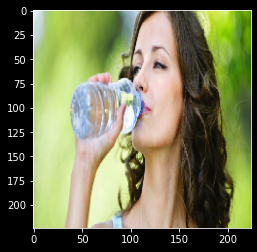

1/1 [==============================] - 0s 274ms/step
Sleeping


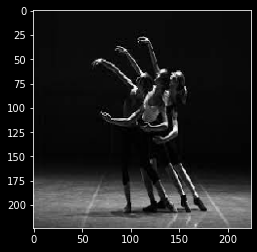

1/1 [==============================] - 0s 30ms/step
Dancing


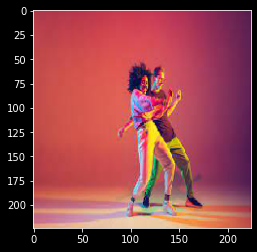

1/1 [==============================] - 0s 30ms/step
Dancing


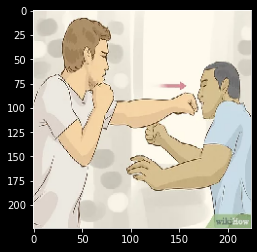

1/1 [==============================] - 0s 89ms/step
Dancing


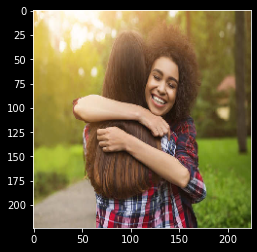

1/1 [==============================] - 0s 25ms/step
Dancing


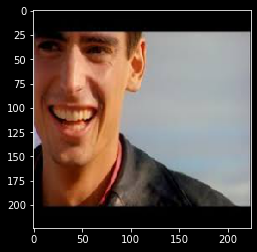

1/1 [==============================] - 0s 32ms/step
Using laptop


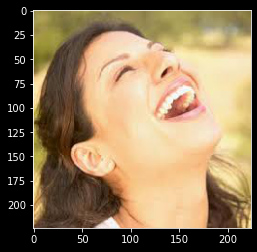

1/1 [==============================] - 0s 21ms/step
Laughing


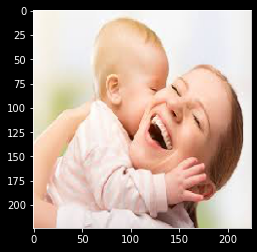

1/1 [==============================] - 0s 21ms/step
Laughing


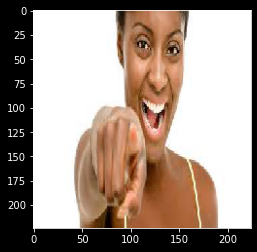

1/1 [==============================] - 0s 27ms/step
Laughing


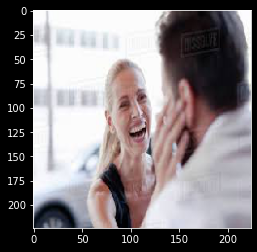

1/1 [==============================] - 0s 22ms/step
Dancing


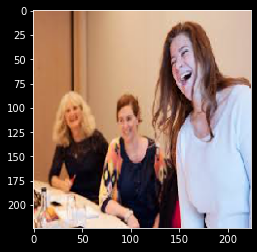

1/1 [==============================] - 0s 24ms/step
Dancing


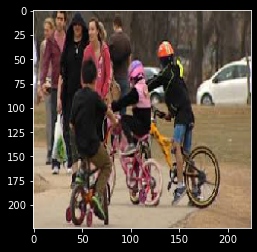

1/1 [==============================] - 0s 88ms/step
Dancing


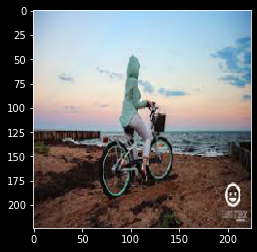

1/1 [==============================] - 0s 27ms/step
Dancing


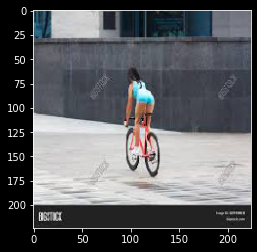

1/1 [==============================] - 0s 38ms/step
Dancing


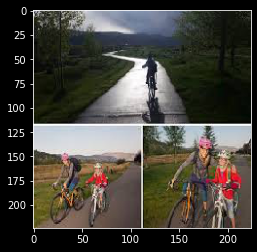

1/1 [==============================] - 0s 25ms/step
Dancing


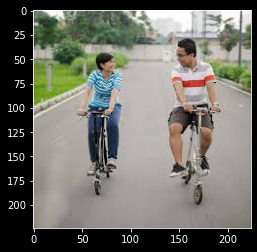

1/1 [==============================] - 0s 25ms/step
Dancing


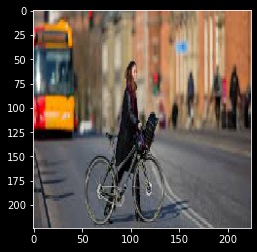

1/1 [==============================] - 0s 20ms/step
Dancing


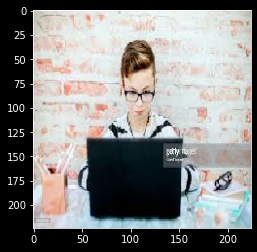

1/1 [==============================] - 0s 24ms/step
Sitting


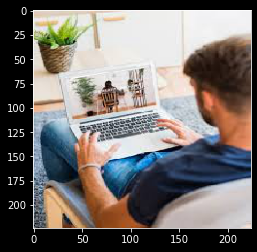

1/1 [==============================] - 0s 23ms/step
Dancing


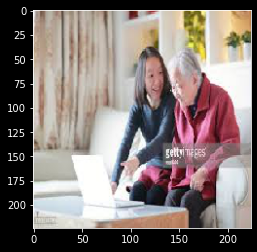

1/1 [==============================] - 0s 21ms/step
Laughing


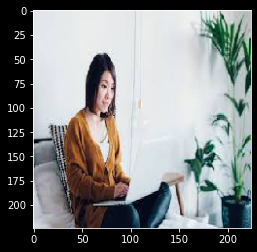

1/1 [==============================] - 0s 20ms/step
Laughing


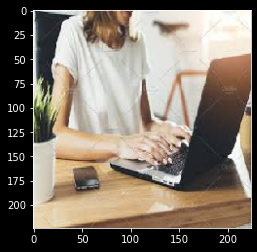

1/1 [==============================] - 0s 25ms/step
Dancing


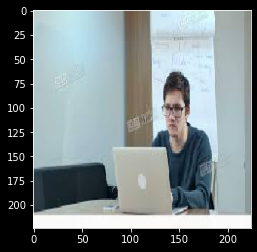

1/1 [==============================] - 0s 23ms/step
Dancing


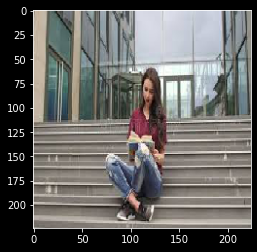

1/1 [==============================] - 0s 54ms/step
Dancing


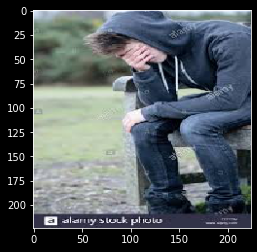

1/1 [==============================] - 0s 24ms/step
Dancing


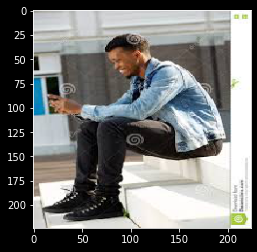

1/1 [==============================] - 0s 21ms/step
Dancing


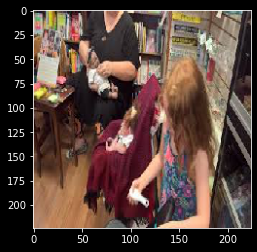

1/1 [==============================] - 0s 42ms/step
Dancing


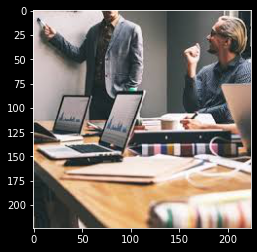

1/1 [==============================] - 0s 27ms/step
Listening to music


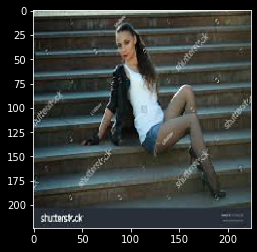

1/1 [==============================] - 0s 19ms/step
Sleeping


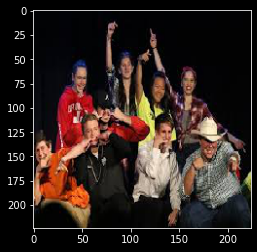

1/1 [==============================] - 0s 20ms/step
Dancing


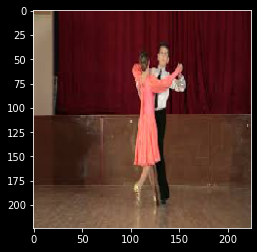

1/1 [==============================] - 0s 22ms/step
Dancing


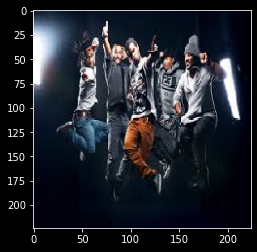

1/1 [==============================] - 0s 23ms/step
Dancing


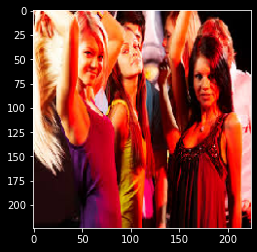

1/1 [==============================] - 0s 40ms/step
Dancing


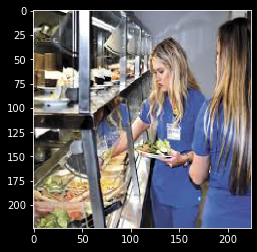

1/1 [==============================] - 0s 23ms/step
Dancing


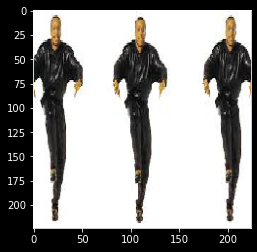

1/1 [==============================] - 0s 21ms/step
Dancing


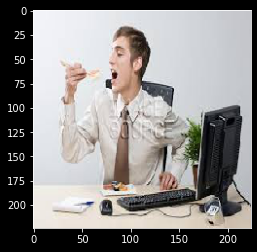

1/1 [==============================] - 0s 22ms/step
Dancing


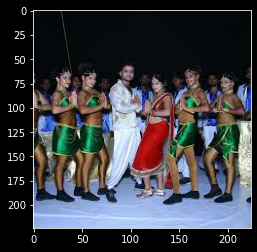

1/1 [==============================] - 0s 22ms/step
Sleeping


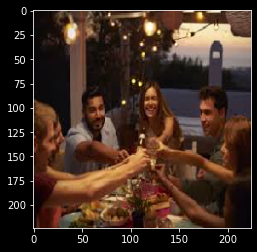

1/1 [==============================] - 0s 28ms/step
Dancing


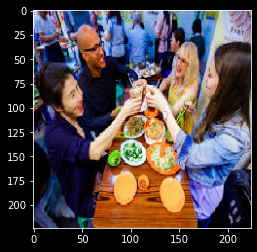

1/1 [==============================] - 0s 28ms/step
Dancing


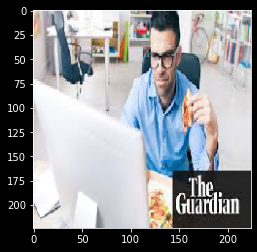

1/1 [==============================] - 0s 30ms/step
Dancing


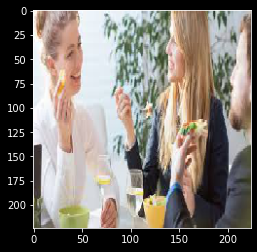

1/1 [==============================] - 0s 28ms/step
Dancing


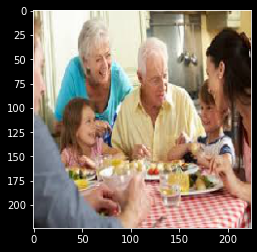

1/1 [==============================] - 0s 22ms/step
Dancing


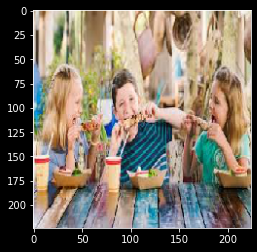

1/1 [==============================] - 0s 30ms/step
Dancing


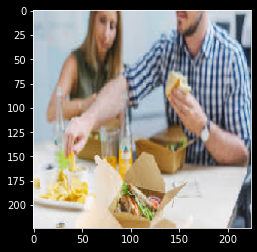

1/1 [==============================] - 0s 28ms/step
Dancing


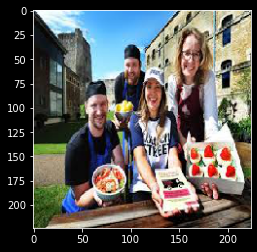

1/1 [==============================] - 0s 25ms/step
Dancing


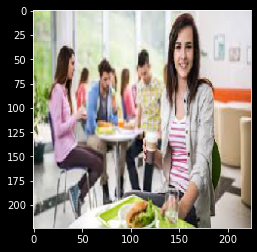

1/1 [==============================] - 0s 26ms/step
Dancing


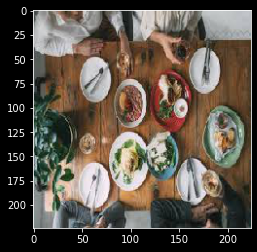

1/1 [==============================] - 0s 35ms/step
Dancing


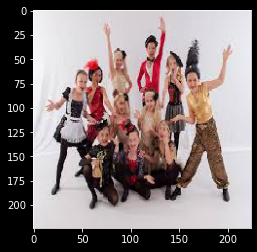

1/1 [==============================] - 0s 23ms/step
Dancing


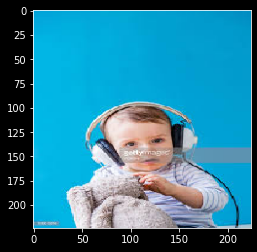

1/1 [==============================] - 0s 31ms/step
Laughing


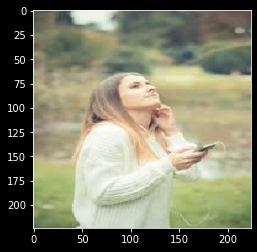

1/1 [==============================] - 0s 22ms/step
Dancing


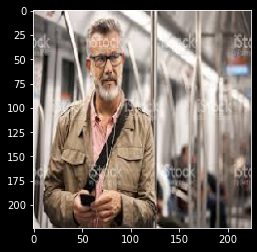

1/1 [==============================] - 0s 25ms/step
Dancing


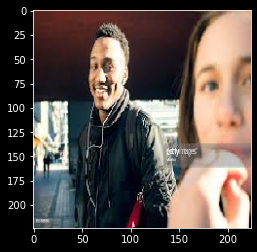

1/1 [==============================] - 0s 25ms/step
Dancing


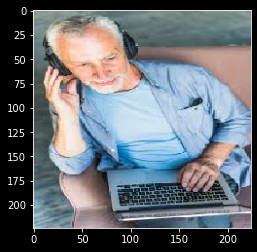

1/1 [==============================] - 0s 23ms/step
Laughing


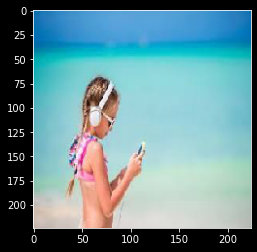

1/1 [==============================] - 0s 23ms/step
Dancing


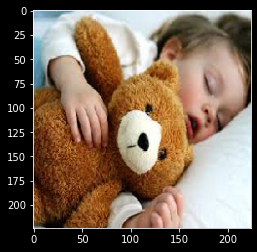

1/1 [==============================] - 0s 22ms/step
Dancing


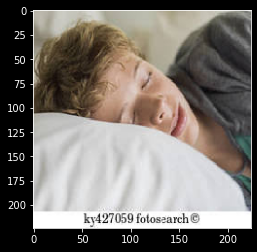

1/1 [==============================] - 0s 23ms/step
Dancing


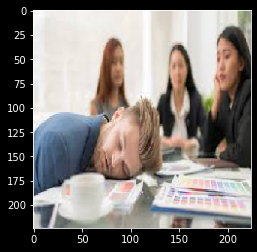

1/1 [==============================] - 0s 22ms/step
Dancing


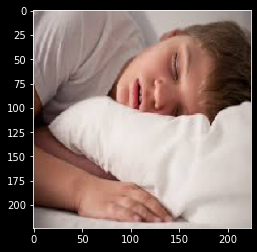

1/1 [==============================] - 0s 21ms/step
Running


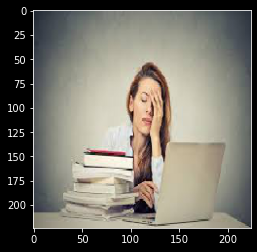

1/1 [==============================] - 0s 21ms/step
Dancing


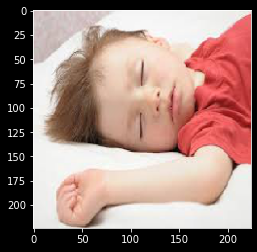

1/1 [==============================] - 0s 29ms/step
Dancing


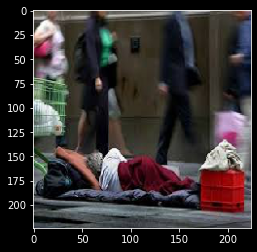

1/1 [==============================] - 0s 24ms/step
Dancing


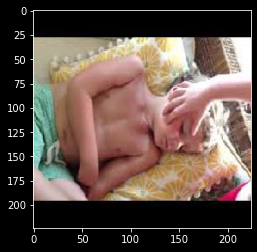

1/1 [==============================] - 0s 21ms/step
Dancing


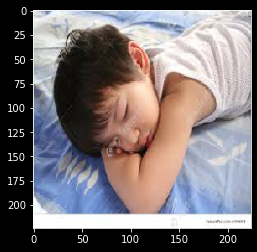

1/1 [==============================] - 0s 26ms/step
Dancing


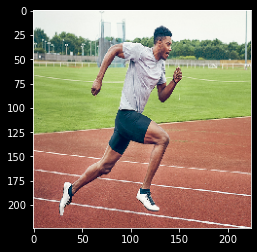

1/1 [==============================] - 0s 31ms/step
Dancing


In [220]:
dir_path = "datasets/human_data/testing"

for i in os.listdir(dir_path):
  imgt = tf.keras.preprocessing.image.load_img(dir_path+"/"+i, target_size=(img_height, img_width))
  plt.imshow(imgt)
  plt.show()

  b = tf.keras.preprocessing.image.array_to_img(imgt)
  b = np.expand_dims(b, axis=0)
  images = np.vstack([b])
  val = model_mobilnet.predict(images)
  score = np.argmax(val)

  if score == 0:
        print("Calling")
  elif score == 1:
        print("Clapping")
  elif score == 2:
        print("Cycling")
  elif score == 3:
        print("Dancing")
  elif score == 4:
        print("Drinking")
  elif score == 5:
        print("Eating")
  elif score == 6:
        print("Fighting")
  elif score == 7:
        print("Hugging")
  elif score == 8:
        print("Laughing")
  elif score == 9:
        print("Listening to music")
  elif score == 10:
        print("Running")
  elif score == 11:
        print("Sitting")
  elif score == 12:
        print("Sleeping")
  elif score == 13:
        print("Texting")
  elif score == 14:
        print("Using laptop")

**Save Model**

In [ ]:
model_imp2.save('model_fix.h5')

NameError: name 'model_imp2' is not defined

Dari hasil Uji Coba Functional Dan Sequential API. kita pilih model Functional API setelah Tunning karena, model ini menawarkan Masalah yang lebih sedikit dibandingkan dengan model lainnya yang telah dibuat. 

---

# 10. Model Inference 

**Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.**

----

In [ ]:
model_inf = load_model('model_fix.h5')

In [ ]:
abc = model_f.predict(df_test1)

94/94 [==============================] - 14s 143ms/step


In [ ]:
abc = np.argmax(abc, axis=1)

In [ ]:
df_abc = pd.DataFrame(abc, columns=['predictions'])

In [ ]:
abc_c = pd.concat([test_df, df_abc], axis=1)

In [ ]:
class_pred = {0: 'calling', 1: 'clapping', 2: 'cycling', 3: 'dancing', 4: 'drinking', 5: 'eating', 6: 'fighting', 7: 'hugging', 8: 'laughing', 9: 'listening_to_music', 10: 'running', 11: 'sitting', 12: 'sleeping', 13: 'texting', 14: 'using_laptop'}

In [ ]:
abc_c['predictions'] = abc_c['predictions'].map(class_pred)

In [ ]:
abc_c

images        labels  \
0     datasets/human_data/test_data\calling\images_0...       calling   
1     datasets/human_data/test_data\calling\images_0...       calling   
2     datasets/human_data/test_data\calling\images_0...       calling   
3     datasets/human_data/test_data\calling\images_0...       calling   
4     datasets/human_data/test_data\calling\images_0...       calling   
...                                                 ...           ...   
2995  datasets/human_data/test_data\using_laptop\ima...  using_laptop   
2996  datasets/human_data/test_data\using_laptop\ima...  using_laptop   
2997  datasets/human_data/test_data\using_laptop\ima...  using_laptop   
2998  datasets/human_data/test_data\using_laptop\ima...  using_laptop   
2999  datasets/human_data/test_data\using_laptop\ima...  using_laptop   

       predictions  
0          calling  
1          calling  
2     using_laptop  
3          hugging  
4          calling  
...            ...  
2995  using_laptop  
2996  using_laptop  
2997  using_laptop  
2998  using_laptop  
2999  using_laptop  

[3000 rows x 3 columns]

<AxesSubplot:xlabel='predictions', ylabel='count'>

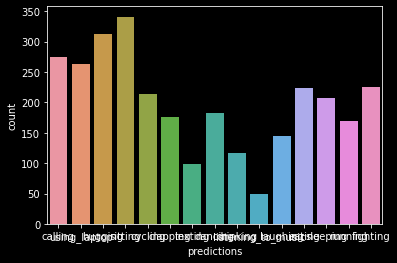

In [ ]:
sns.countplot(x='predictions', data=abc_c)

----

In [ ]:
keras.backend.clear_session()

# 11. Pengambilan Kesimpulan

**Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.**

Melalui percobaan yang dilakukan dengan berbagai macam Model Machine Learning dibawah ini merupakan hasil perbandingan Akurasi dari model yang telah dibuat: 

**Before Improvement**

---

Sequential : accuracy                           0.71

---

Functional : accuracy                           0.69

----

**After Improvement using Pretrained Model**

---

Sequential : accuracy                           0.59

---

Functional: accuracy                           0.63

---

Rata - Rata Model memiliki Nilai Training Akurasi yang Cukup tinggi sebelum ditunning, tetapi jika dilihat perbedaan antara validasi akurasi dan Training Akurasinya model ini memiliki perbedaan yang cukup jauh rangenya. 

Diantara percobaan terhadap ke-empat model yang telah dibuat, hasil akurasi yang kita gunakan ada pada Functional API setelah di Tunning. Model ini akan kita gunakan pada deployment. Meskipun, Nilai Lossnya terus meningkat. Namun tingkat akurasinya yang terus meningkat, menjadi alasan kenapa kita gunakan Model ini.

### After Word

Karena data yang kita olah imbalance (Class 0 serta Class 1 yang memiliki perbedaan jumlah yang cukup jauh) mungkin mempengaruhi hasil dari Akurasi. Jika kita apply SMOTE pada training, Algoritma Machine Learning yang digunakan mampu memperbaiki prediksi pada class 1. 
Selain itu, Akurasi sendiri dapat dipengaruhi oleh proses preprocessing. Apakah metode yang digunakan tepat, sesuai dengan kebutuhan dari Dataset. Kemungkinan dapat terjadi Kesalahan pada proses preprocessing yang menyebabkan rendahnya nilai akurasi.  

---